In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [93]:
data_path = './data/players_20.csv'
df = pd.read_csv(data_path)
df.fillna(0, inplace = True)
df = df.drop(['player_url','dob','real_face','player_tags','long_name','sofifa_id','skill_moves'], axis = 1)
for col in df.columns:
    print(col)

short_name
age
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
release_clause_eur
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_marking
defending_standing_tackle
defending_sliding

In [81]:
#CLUB VALUES

In [78]:
#getting the 20 top valued clubs

clubs = df['club'].unique()
club_names = []
club_values = np.zeros((clubs.shape[0],1))

for i, club in enumerate(clubs):
    rows_with_club = df.loc[df['club'] == club]
    
    #club value as sum of market values of players
    mkt_values = rows_with_club['value_eur']
    club_names.append(club)
    
    club_values[i] = pd.Series.sum(mkt_values)

In [80]:
# print(club_values)
sort_val_idxs = np.argsort(club_values, axis = 0)
sort_val_idxs = np.flip(np.squeeze(sort_val_idxs))

club_values = club_values[sort_val_idxs]
club_names[:] = [club_names[i] for i in sort_val_idxs] 

# for i in range(len(club_names)):
#     print(club_names[i],club_values[i])

[897850000.0, 869300000.0, 845745000.0, 735475000.0, 693265000.0, 688775000.0, 687550000.0, 649850000.0, 590375000.0, 532325000.0, 518275000.0, 504970000.0, 501675000.0, 454860000.0, 448610000.0, 406355000.0, 384745000.0, 384060000.0, 382760000.0, 359400000.0]


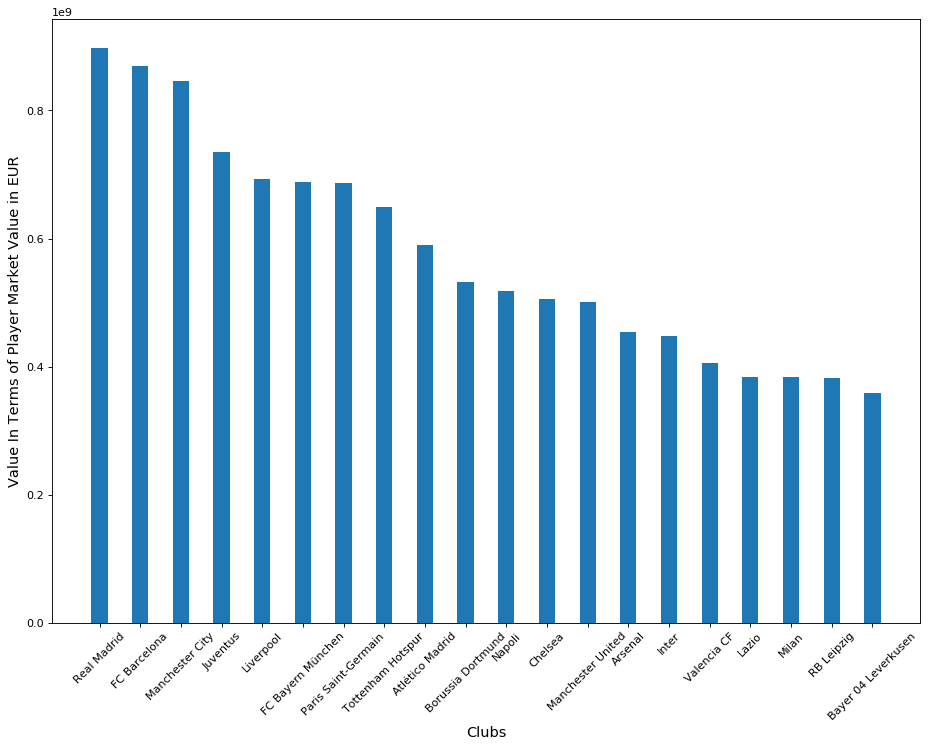

In [77]:
top_50_club_val = club_values[:20,0]
top_50_club_val_names = club_names[:20]

#generate plot
print(list(top_50_club_val))
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Clubs', fontsize = 13)
plt.ylabel('Value In Terms of Player Market Value in EUR',fontsize = 13)
plt.bar(range(20),height = list(top_50_club_val),width= 0.4,align='center')
plt.xticks(range(20), top_50_club_val_names, rotation = 45)
# plt.set_xticklabels(top_50_club_val_names, rotation=45 )
plt.savefig('foo.png', bbox_inches='tight')

In [83]:
#TODO : CLUB VALUES WITH PLAYER VALUES STACKED ON TOP OF EACH OTHER

In [ ]:
df['club'].value_counts()['Chelsea']

In [109]:
#market value per position

positions = df['team_position'].unique()
print(positions)

print(len(df))
dfposmval = df[df['team_position'] != 0]
dfposmval = dfposmval[dfposmval['team_position'] != 'RES']
print(len(dfposmval))

positions = dfposmval['team_position'].unique()
print(positions)




# wingback
# cb
# mid
# gk
# forward

['RW' 'LW' 'CAM' 'GK' 'RCM' 'LCB' 'ST' 'CDM' 'LDM' 'RM' 'RCB' 'LCM' 'LM'
 'CF' 'SUB' 'LB' 'LS' 'RB' 'RDM' 'RES' 'RAM' 'RS' 'RF' 'CM' 'CB' 'LF'
 'LAM' 0 'RWB' 'LWB']
18278
15080
['RW' 'LW' 'CAM' 'GK' 'RCM' 'LCB' 'ST' 'CDM' 'LDM' 'RM' 'RCB' 'LCM' 'LM'
 'CF' 'SUB' 'LB' 'LS' 'RB' 'RDM' 'RAM' 'RS' 'RF' 'CM' 'CB' 'LF' 'LAM'
 'RWB' 'LWB']


In [85]:
#logistic regression per position one vs all
